### WAY TO DISCRETE WAVE NUMBER METHOD

In [ ]:
#https://qiita.com/sai-sui/items/9650ff14af54dd147a39

## PREPARE: DISCRETE FOURIER TRANSFORM

In [893]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import math

In [1204]:
#t=> x
def dft_(f):
    n = len(f)
    F = []
    for x in range(n):
        val = 0 + 0j
        for t in range(n):
            val += f[t] * np.exp(-1j * 2 * np.pi * t * x / n)
        F.append(val)
    return F

In [1205]:
#x=>t
def idft_(F):
    N = len(F)
    f = []
    for t in range(N): 
        val = 0 + 0j 
        for x in range(N): 
            val += Y[x] * np.exp(1j * 2 * np.pi * x * t / N) 
        f.append(val/N)
    return f

In [1206]:
t = np.arange(0, 2*np.pi, 0.01)
f = np.cos(t)

In [1207]:
ran = np.array(range(len(f)))

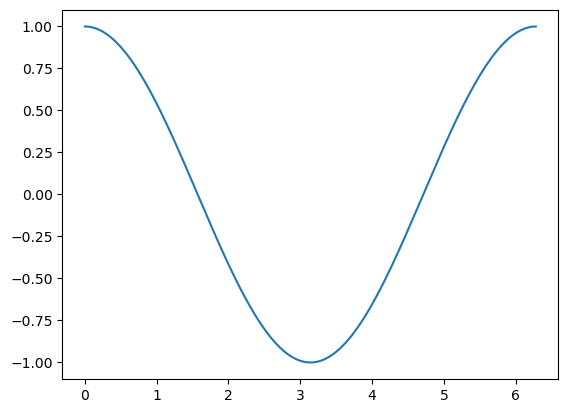

In [1215]:
plt.plot(t,f)

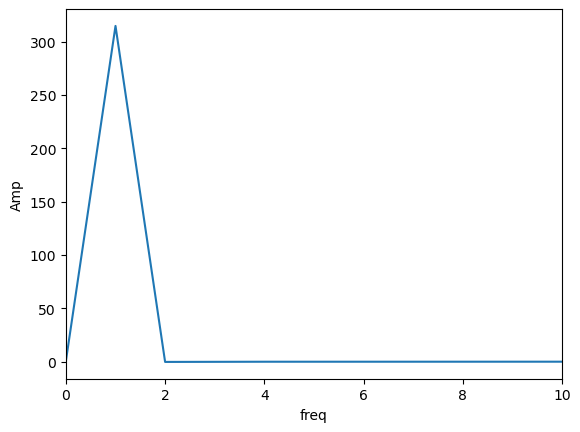

In [1217]:
f_ = dft_(f)
plt.xlim(0,10)
plt.xlabel('freq')
plt.ylabel('Amp')
plt.plot(ran, f_)

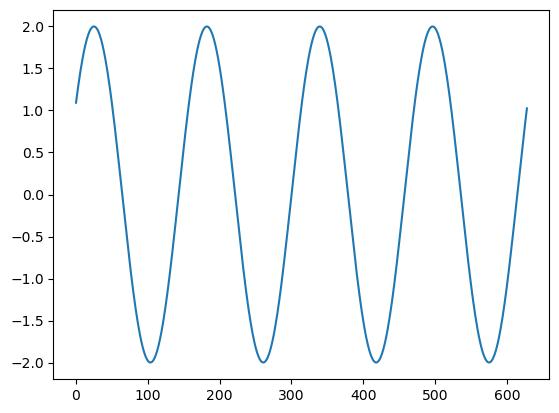

In [1210]:

f_v = idft_(f_)
plt.plot(ran, f_v)

## DISCRETE WAVE NUMBER METHOD

In [1211]:
#https://ja.wikipedia.org/wiki/%E9%9B%A2%E6%95%A3%E3%83%95%E3%83%BC%E3%83%AA%E3%82%A8%E5%A4%89%E6%8F%9B

In [1172]:
# the DFT with the phase shift
#t => w domain
def dft_bouchon(f, omega_imag=-1j*2*np.pi):
    n = len(f)
    Y = []
    for x in range(n):
        y = 0j
        for t in range(n):
            y += f[t] * np.exp(-1j * (2 * np.pi * x * t + 2 * np.pi * omega_imag * t) /n)  
        Y.append(y)
    return Y

# the IDFT with the phase shift
#w => t domain
def idft_bouchon(Y, omega_imag=-1j*2*np.pi):
    n = len(Y)
    f = []
    for t in range(n):
        k = 0j
        for x in range(n):
            k += Y[x] * np.exp(1j * (2 * np.pi * x * t + 2 * np.pi * omega_imag * t) / n)
        f.append(k / n)
    return f

In [1173]:
#parameters
L = 25*10 **3
alpha = 5* 10 **3
r = 10* 10 **3
z = 1* 10 **3
omegas = np.linspace(0,1000,2000)
t = np.linspace(0,20,2000)
omega_imag = (-1j * 2 * np.pi)
n_range = np.arange(0, 1000)

In [1174]:
#f_s = 500 # サンプリングレート f_s[Hz] (任意)
#t_fin = 20 # 収録終了時刻 [s] (任意)
#dt = 1/f_s # サンプリング周期 dt[s]
#N = int(f_s * t_fin) # サンプル数 [個]
#t = np.arange(0, t_fin, dt) 
#omegas = np.fft.fftfreq(N, d=dt) # 周波数を割り当てる（※後述）

In [1175]:
omegas =  np.array(omegas)+omega_imag

In [1176]:
#Sommerfeld Identity
err_for_1 = 0
def u_values_omega_domain(omegas):
    u_values = []
    for omega in omegas:
        u_sum = 0j
        for n in n_range:
            k = 2 * n * np.pi / L
            nu = np.sqrt((omega / alpha) ** 2 - k ** 2) if np.imag(np.sqrt((omega / alpha) ** 2 - k ** 2)) < 0 else  -1*np.sqrt((omega / alpha) ** 2 - k ** 2)
            if(np.imag(nu) > 0):
                err_for_1 += 1
            if n == 0:
                u_sum += (1j * np.pi / L) * (k ** 2 / nu) * scipy.special.jv(1, k * r) * np.exp(-1j * nu * np.abs(z))
            else:
                u_sum += (2 * (1j * np.pi / L) * (k ** 2 / nu) * scipy.special.jv(1, k * r) * np.exp(-1j * nu * np.abs(z)))
        u_values.append(u_sum)
    return np.array(u_values)

In [1177]:
err_for_2 = 0
def phi_values_omega_domain(omegas):
    u_values = []
    for omega in omegas:
        u_sum = 0j
        for n in n_range:
            k = 2 * n * np.pi / L
            nu = np.sqrt((omega / alpha) ** 2 - k ** 2) if np.imag(np.sqrt((omega / alpha) ** 2 - k ** 2)) < 0 else  -1*np.sqrt((omega / alpha) ** 2 - k ** 2)
            if(np.imag(nu) > 0):
                err_for_2 += 1
            if n == 0:
                u_sum += (-1j * np.pi / L) * (k / nu) * scipy.special.jv(0, k * r) * np.exp(-1j * nu * np.abs(z))
            else:
                u_sum += (2 * (-1j * np.pi / L) * (k / nu) * scipy.special.jv(0, k * r) * np.exp(-1j * nu * np.abs(z)))
        u_values.append(u_sum)
    return np.array(u_values)

In [1178]:
u_omega = u_values_omega_domain(omegas)

In [1179]:
u_omega_phi = phi_values_omega_domain(omegas)

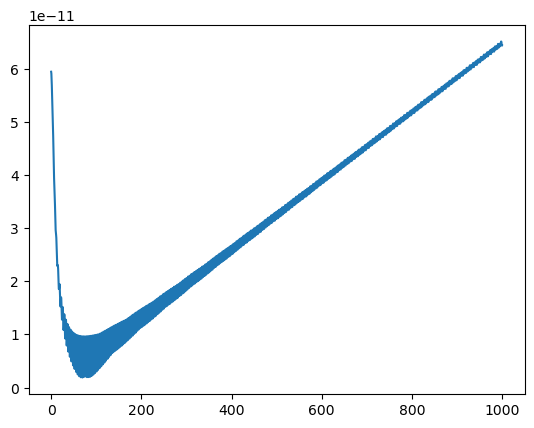

In [1180]:
plt.plot(omegas, np.abs(u_omega))

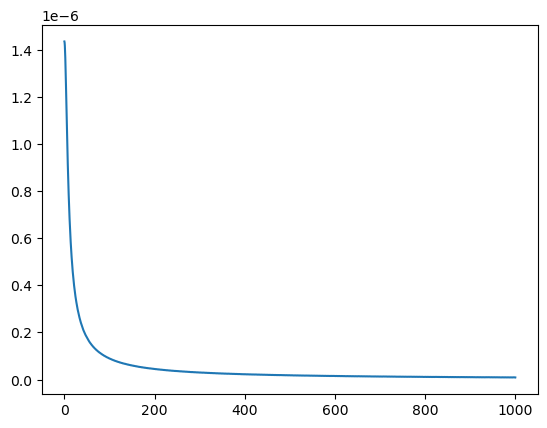

In [1181]:
plt.plot(omegas, np.abs(u_omega_phi))

In [1182]:
u_t= idft_bouchon(u_omega)

In [1183]:
u_t_phi = idft_bouchon(u_omega_phi)

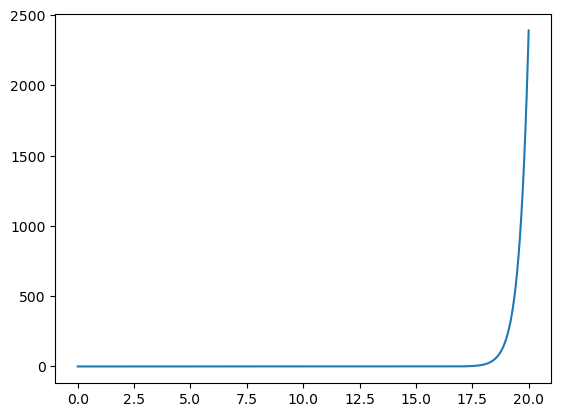

In [1184]:
plt.plot(t, u_t)

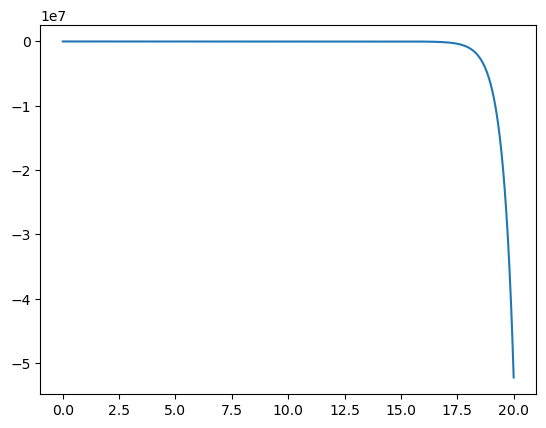

In [1185]:
plt.plot(t, u_t_phi)

### SHIFT BY REAL NUMBER TO SHOW THE METHOD IS PRECISE APPARENTLY

In [982]:
# the DFT with the phase shift
#t => w domain
def dft_bouchon(f, m = 0):
    n = len(f)
    Y = []
    for x in range(n):
        y = 0j
        for t in range(n):
            y += f[t] * np.exp(-1j * (2 * np.pi * x * t + 2 * np.pi * m * t) /n)  #右にシフトはmの係数が負
        Y.append(y)
    return Y

# the IDFT with the phase shift
#w => t domain
def idft_bouchon(Y, m = 0):
    n = len(Y)
    f = []
    for t in range(n):
        k = 0j
        for x in range(n):
            k += Y[x] * np.exp(1j * (2 * np.pi * x * t + 2 * np.pi * m * t) / n) 
        f.append(k / n)
    return f

In [1191]:
t = np.arange(0, 2*np.pi, 0.01)
f = np.cos(t)

In [1192]:
ran = np.array(range(len(f)))

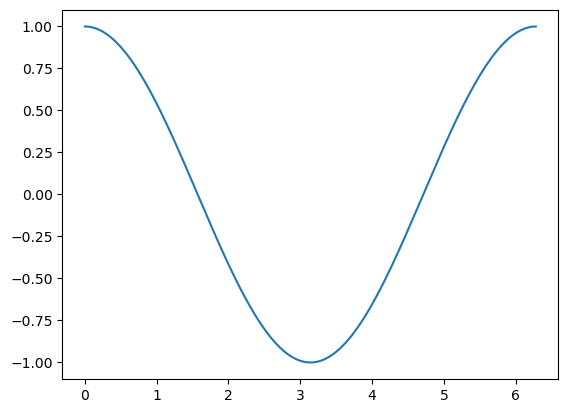

In [1193]:
plt.plot(t,f)

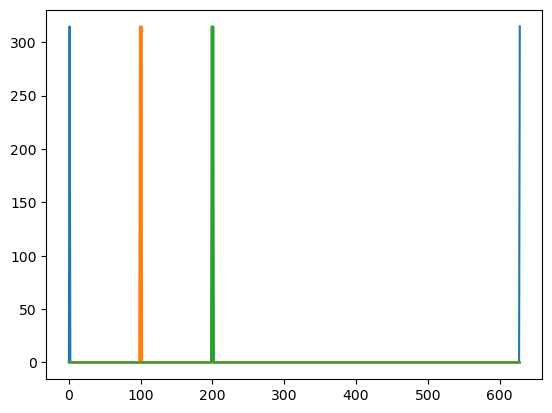

In [1194]:
Y_0 = np.array(dft_bouchon(f, 0))
Y_1 = np.array(dft_bouchon(f, -100))
Y_2 = np.array(dft_bouchon(f, -200))

plt.xlabel('freq')
plt.ylabel('Amp')
plt.plot(ran,abs(Y_0))
plt.plot(ran,abs(Y_1))
plt.plot(ran,abs(Y_2))

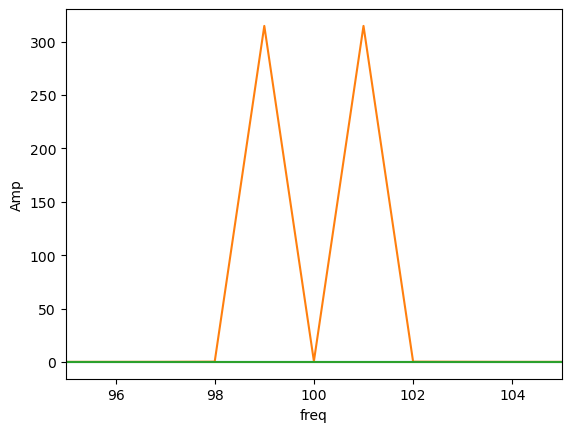

In [1220]:
plt.xlim(95,105)
plt.xlabel('freq')
plt.ylabel('Amp')
plt.plot(ran,abs(Y_0))
plt.plot(ran,abs(Y_1))
plt.plot(ran,abs(Y_2))

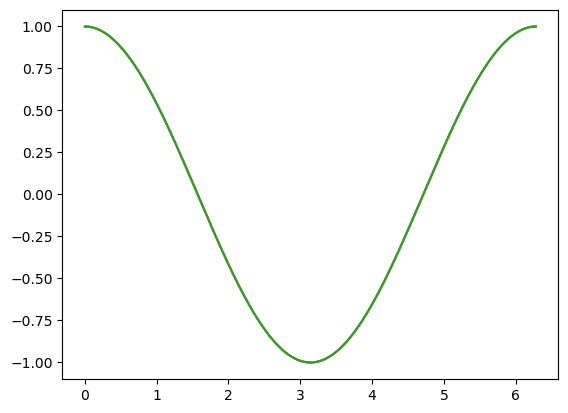

In [1196]:
Y_0_inv = idft_bouchon(Y_0,0)
Y_1_inv = idft_bouchon(Y_1,-100)
Y_2_inv = idft_bouchon(Y_2, -200)

plt.plot(t,Y_0_inv)
plt.plot(t,Y_1_inv)
plt.plot(t,Y_2_inv)

In [1190]:
1/ 2*0.01

0.005